In [6]:
# Analysing missing mass data
import astropy.io.fits as fits
import numpy as np
from astropy.table import unique,Table,setdiff, hstack,join
from matplotlib.colors import LogNorm
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

# Read in G3CGalv10 and StellarMassesPanChromm
galaxies = Table.read('/suphys/fscu5535/python_scripts/raw_data/G3CGalv10.fits',memmap=True)
galaxies.info()
masses = Table.read('/suphys/fscu5535/python_scripts/raw_data/StellarMassesPanChromv24.fits',memmap=True)
masses.info()

# # Extract relevant columns from each table
# galaxiesRel = hstack(galaxies['CATAID','GroupID','RankIterCen'])
# massesRel = hstack(masses['CATAID','logmstar'])

# # join the resulting tables
# galaxiesAndMasses = join(galaxiesRel,massesRel,keys='CATAID')
# print(galaxiesAndMasses)

<Table length=204110>
     name      dtype    unit     class    
------------- ------- ------- ------------
       CATAID   int32         MaskedColumn
           RA float64     deg       Column
          Dec float64     deg       Column
            Z float32               Column
       Rpetro float32     mag       Column
 DM_100_25_75 float32     mag       Column
  SURVEY_CODE   int16         MaskedColumn
       SigErr float32  km / s       Column
      GroupID   int32         MaskedColumn
  RankIterCen   int16         MaskedColumn
   SepIterCen float32  arcsec       Column
 CoSepIterCen float32 Mpc / h       Column
AngSepIterCen float32 Mpc / h       Column
      RankBCG   int16         MaskedColumn
       SepBCG float32  arcsec       Column
     CoSepBCG float32 Mpc / h       Column
    AngSepBCG float32 Mpc / h       Column
      RankCen   int16         MaskedColumn
       SepCen float32  arcsec       Column
     CoSepCen float32 Mpc / h       Column
    AngSepCen float32 Mpc / h   

In [18]:
# find number
groupCATIDS = []
GROUPgroupCATIDS = []
for i in range(len(galaxies)):
    if galaxies['GroupID'][i] != 0:
        groupCATIDS.append(galaxies['CATAID'][i])
        GROUPgroupCATIDS.append(galaxies['GroupID'][i])
        
print(len(groupCATIDS))


massCATIDS = []
for i in range(len(masses)):
    if masses['logmstar'][i] > 0:
        massCATIDS.append(masses['CATAID'][i])
        
print(len(massCATIDS))
        
# Extract relevant columns from each table
galaxiesRel = Table()
galaxiesRel['CATAID'] = groupCATIDS
galaxiesRel['GroupID'] = GROUPgroupCATIDS

massesRel = Table()
massesRel['CATAID'] = massCATIDS

# join the resulting tables
galaxiesAndMasses = join(galaxiesRel,massesRel,keys='CATAID')
galaxiesAndMasses.info()
        

83093
199563
<Table length=74912>
  name  dtype
------- -----
 CATAID int32
GroupID int32


In [24]:
print(len(set(galaxiesAndMasses['GroupID'])))
print(len(set(galaxiesRel['GroupID'])))
print((len(set(galaxiesRel['GroupID']))-len(set(galaxiesAndMasses['GroupID']))))
print((83093-74912)/83093)
print(83093-74912)
print(np.mean(masses['logmstar']))

23643
26194
2551
0.0984559469510067
8181
10.194611


# plt.figure(figsize=(8,6),dpi=100)251
plt.hist(masses['logmstar'])

In [110]:
# Remove all ungrouped galaxies (RankIterCen == -999 or GroupID == 0)
rows_to_remove = list()
for i in range(len(galaxiesAndMasses)):
    if galaxiesAndMasses['RankIterCen'][i] == -999 or galaxiesAndMasses['GroupID'][i] == 0:
        rows_to_remove.append(i)
print("Matching complete,",len(rows_to_remove),"to be removed")
print("Number of rows that will remain:",len(galaxiesAndMasses)-len(rows_to_remove))

# Convert list to table and remove from tabletoReduce
rows_to_remove_table = Table()
rows_to_remove_table['row_number'] = rows_to_remove
galaxiesAndMasses.remove_rows(rows_to_remove_table['row_number'])
print(len(galaxiesAndMasses),"galaxies retained.")


Matching complete, 109052 to be removed
Number of rows that will remain: 75029
75029 galaxies retained.


117 galaxies with missing masses out of 75029
[200370, 200370, 200370, 301450, 203550, 300821, 203661, 203838, 302730, 303427, 303426, 303427, 203894, 200610, 300150, 303671, 300126, 303709, 303708, 303772, 204327, 200053, 204470, 204800, 201967, 200426, 202060, 200139, 201131, 100128, 300166, 300005, 300946, 300594, 200006, 200006, 200006, 206749, 300048, 301971, 300282, 304842, 300618, 300291, 300291, 207135, 207135, 202681, 202681, 202681, 100179, 100179, 100179, 305649, 302274, 304720, 301021, 104184, 100367, 101776, 104331, 104331, 305986, 101821, 101821, 104465, 104472, 104655, 100263, 100568, 101951, 101951, 101951, 105070, 105070, 104959, 105278, 105337, 300700, 306584, 301262, 307069, 100116, 102185, 105541, 100630, 207314, 202740, 207315, 200792, 307155, 302730, 302730, 100280, 106104, 300509, 300509, 300509, 300509, 300335, 307696, 307996, 106309, 106309, 100001, 106412, 303671, 205690, 305793, 102115, 307155, 102518, 100686, 106690, 107272, 107359, 107359]


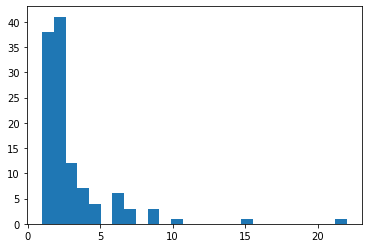

In [111]:
# See how many galaxies have missing mass and what their Rank is
IDMissingMass = list()
RankMissingMass = list()
GroupIDMissing = list()

for i in range(len(galaxiesAndMasses)):
    if galaxiesAndMasses['logmstar'][i] == 0:
        IDMissingMass.append(galaxiesAndMasses['CATAID'][i])
        RankMissingMass.append(galaxiesAndMasses['RankIterCen'][i])
        GroupIDMissing.append(galaxiesAndMasses['GroupID'][i])

RankMissingMassHist = plt.hist(RankMissingMass,bins='auto')
print(len(IDMissingMass),"galaxies with missing masses out of",len(galaxiesAndMasses))
print(GroupIDMissing)

In [112]:
GroupIDMissingTable = Table()
GroupIDMissingTable['GroupID'] = GroupIDMissing
GroupIDMissingUnique = unique(GroupIDMissingTable)
print(len(GroupIDMissingUnique))
print(GroupIDMissingUnique)

92
GroupID
-------
 100001
 100116
 100128
 100179
 100263
 100280
 100367
    ...
 305793
 305986
 306584
 307069
 307155
 307696
 307996
Length = 92 rows


In [113]:
# Now remove all the galaxies that belong to these groups
# Iterate through both tables, comparing the two columns and removing any entries that don't match

rows_to_remove = list()
for i in range(len(galaxiesAndMasses)):
    for j in range(len(GroupIDMissingUnique)):
        if galaxiesAndMasses['GroupID'][i] == GroupIDMissingUnique['GroupID'][j]:
            rows_to_remove.append(i)
print("Matching complete,",len(rows_to_remove),"to be removed")
print("Number of rows that will remain:",len(galaxiesAndMasses)-len(rows_to_remove))

# Convert list to table and remove from tabletoReduce. Then write to file.  
rows_to_remove_table = Table()
rows_to_remove_table['row_number'] = rows_to_remove
galaxiesAndMasses.remove_rows(rows_to_remove_table['row_number'])
print(len(galaxiesAndMasses),"galaxies retained.")
galaxiesAndMasses.write('/suphys/fscu5535/python_scripts/mod_data/galaxiesAndMassesOnlyGroupsNoMissingMasses.fits',format='fits',overwrite=True)
print("Written to file")

Matching complete, 596 to be removed
Number of rows that will remain: 74433
74433 galaxies retained.
Written to file


In [115]:
# now check that this table only has grouped galaxies with mass data
missingMass = 0
ungroupedbyRank = 0
ungroupedbyGroupID = 0
for i in range(len(galaxiesAndMasses)):
    if galaxiesAndMasses['logmstar'][i] == 0:
        missingMass += 1
    if galaxiesAndMasses['RankIterCen'][i] == -999:
        ungroupedbyRank += 1
    if galaxiesAndMasses['GroupID'][i] == 0:
        ungroupedbyGroupID += 1
print(missingMass)
print(ungroupedbyRank)
print(ungroupedbyGroupID)
galaxiesAndMasses.info()

0
0
0
<Table length=74433>
    name     dtype     unit      class    
----------- ------- --------- ------------
     CATAID   int32           MaskedColumn
    GroupID   int32           MaskedColumn
RankIterCen   int16           MaskedColumn
   logmstar float32 dex(Msun)       Column


In [116]:
# Excellent. Now group data by groupID and sort by logmstar. Then extract the CATAID's all the heaviest galaxy
# in each group.

galaxiesAndMassesGrouped = galaxiesAndMasses.group_by('GroupID')
galaxiesAndMassesGrouped.sort(['GroupID','logmstar'])

heaviestGalaxyIDs = list()
heaviestGalaxyGroupIDs = list()
for i in range(len(galaxiesAndMassesGrouped.groups)):
        lastEntry = len(galaxiesAndMassesGrouped.groups[i])-1
        heaviestGalaxyIDs.append(galaxiesAndMassesGrouped.groups[i][lastEntry]['CATAID'])
        heaviestGalaxyGroupIDs.append(galaxiesAndMassesGrouped.groups[i][lastEntry]['GroupID'])
        
print(len(heaviestGalaxyIDs), "heaviest galaxy IDs found")
print(heaviestGalaxyIDs[0:50])

# Form data into a table
heaviestGalaxyData = Table()
heaviestGalaxyData['CATAID'] = heaviestGalaxyIDs
heaviestGalaxyData['GroupID'] = heaviestGalaxyGroupIDs


23562 heaviest galaxy IDs found
[599753, 601103, 549404, 418238, 372123, 3586877, 203295, 3853225, 377247, 551525, 641935, 419487, 599911, 347976, 574791, 214250, 418947, 204691, 377672, 419342, 623542, 198154, 574622, 381206, 214484, 215479, 3905119, 3913313, 300508, 387849, 518958, 205038, 214613, 381752, 383269, 417750, 600875, 210675, 279786, 300929, 301942, 322923, 551505, 300595, 346676, 386813, 422219, 600630, 323174, 324767]


In [118]:
# Now we want to go through the Stelkin table and find all the GroupIDs whose heaviest
# galaxies are not in SAMI

Stelkin = Table.read('/suphys/fscu5535/python_scripts/mod_data/samiDR3Stelkin_in_GAMA.fits',memmap=True)

# Iterate through both tables, comparing the two columns and removing any entries that don't match

GroupIDsToRemove = list()
for i in range(len(heaviestGalaxyData)):
    matching = False
    for j in range(len(Stelkin)):
        if matching == False and heaviestGalaxyData['CATAID'][i] == Stelkin['CATAID'][j]:
            matching = True
            break
    if matching == False:
        GroupIDsToRemove.append(heaviestGalaxyData['GroupID'][i])
print("Matching complete,",len(GroupIDsToRemove),"galaxies not in SAMI")
GroupIDsToRemoveTable = Table()
GroupIDsToRemoveTable['GroupID'] = GroupIDsToRemove
print(len(unique(GroupIDsToRemoveTable,keys='GroupID')),"groups need to be removed")
    

Matching complete, 22964 galaxies not in SAMI
22964 groups need to be removed


In [119]:
GroupIDsToRemoveTable.info()
print(GroupIDsToRemoveTable)

<Table length=22964>
  name  dtype
------- -----
GroupID int32
GroupID
-------
 100002
 100003
 100004
 100005
 100007
 100008
 100009
    ...
 307994
 307995
 307997
 307999
 308000
 308001
 308002
Length = 22964 rows


In [121]:
galaxiesAndMasses.info()
galaxiesAndMassesGrouped.info()

<Table length=74433>
    name     dtype     unit      class    
----------- ------- --------- ------------
     CATAID   int32           MaskedColumn
    GroupID   int32           MaskedColumn
RankIterCen   int16           MaskedColumn
   logmstar float32 dex(Msun)       Column
<Table length=74433>
    name     dtype     unit      class    
----------- ------- --------- ------------
     CATAID   int32           MaskedColumn
    GroupID   int32           MaskedColumn
RankIterCen   int16           MaskedColumn
   logmstar float32 dex(Msun)       Column


In [122]:
# Now find all galaxies in galaxiesAndMasses in these groups and remove them
# Iterate through both tables, comparing the two columns and removing any entries that don't match
rows_to_remove = list()
for i in range(len(galaxiesAndMasses)):
    for j in range(len(GroupIDsToRemoveTable)):
        if galaxiesAndMasses['GroupID'][i] == GroupIDsToRemoveTable['GroupID'][j]:
            rows_to_remove.append(i)
            break

print("Matching complete,",len(rows_to_remove),"to be removed")
print("Number of rows that will remain:",len(galaxiesAndMasses)-len(rows_to_remove))

# Convert list to table and remove from tabletoReduce. Then write to file.  
rows_to_remove_table = Table()
rows_to_remove_table['row_number'] = rows_to_remove
galaxiesAndMasses.remove_rows(rows_to_remove_table['row_number'])
print(len(galaxiesAndMasses),"galaxies retained.")

galaxiesAndMasses.write('/suphys/fscu5535/python_scripts/mod_data/galaxiesAndMassesOnlyGroupsNoMissingMassesHeaviestInSAMI.fits',format='fits',overwrite=True)
print("data written to file.")

Matching complete, 71717 to be removed
Number of rows that will remain: 2716
2716 galaxies retained.
data written to file.


In [123]:
rows_to_remove_table.info()

<Table length=71717>
   name    dtype
---------- -----
row_number int64


In [129]:
# Now do a left join with relevant columns of Stelkin and write to file
StelkinRelevant = hstack(Stelkin['CATAID','LAMBDAR_RE'])
MassGapData = join(galaxiesAndMasses,StelkinRelevant,join_type='left',keys='CATAID')
MassGapData.write('/suphys/fscu5535/python_scripts/mod_data/massGapData_OnlyGroupsNoMissingMassesHeaviestInSAMI.fits',format='fits',overwrite=True)

In [130]:
MassGapData.info()

<Table length=2716>
    name     dtype     unit      class     n_bad
----------- ------- --------- ------------ -----
     CATAID   int64           MaskedColumn     0
    GroupID   int32           MaskedColumn     0
RankIterCen   int16           MaskedColumn     0
   logmstar float32 dex(Msun)       Column     0
 LAMBDAR_RE float32           MaskedColumn  1801
